<a href="https://colab.research.google.com/github/KhmAsif/IMSE441Spring24/blob/main/Solution_to_Midterm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In class part**

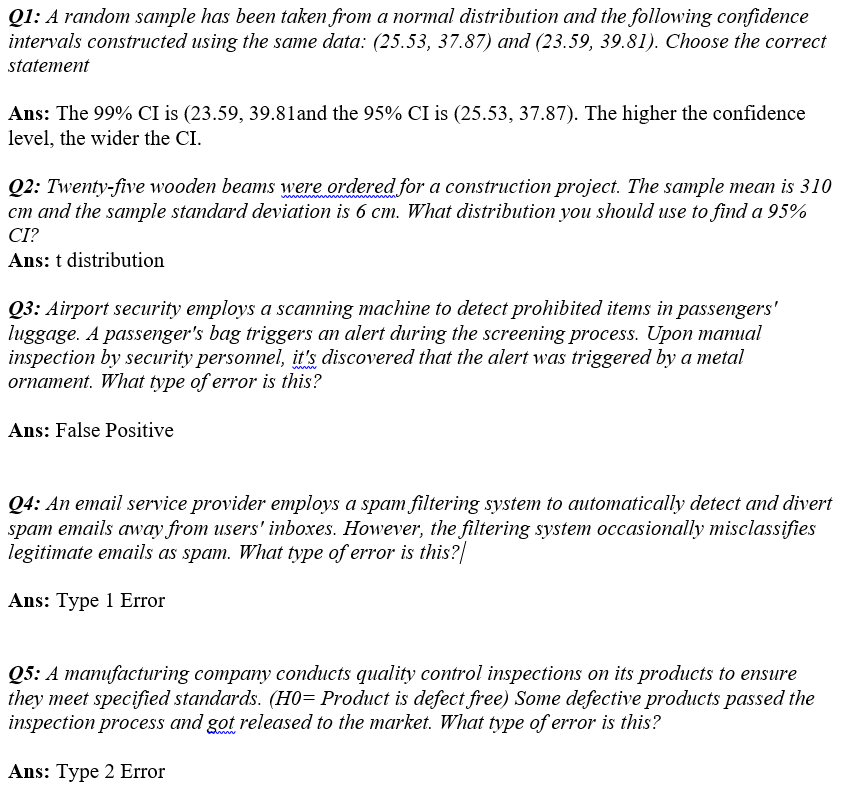

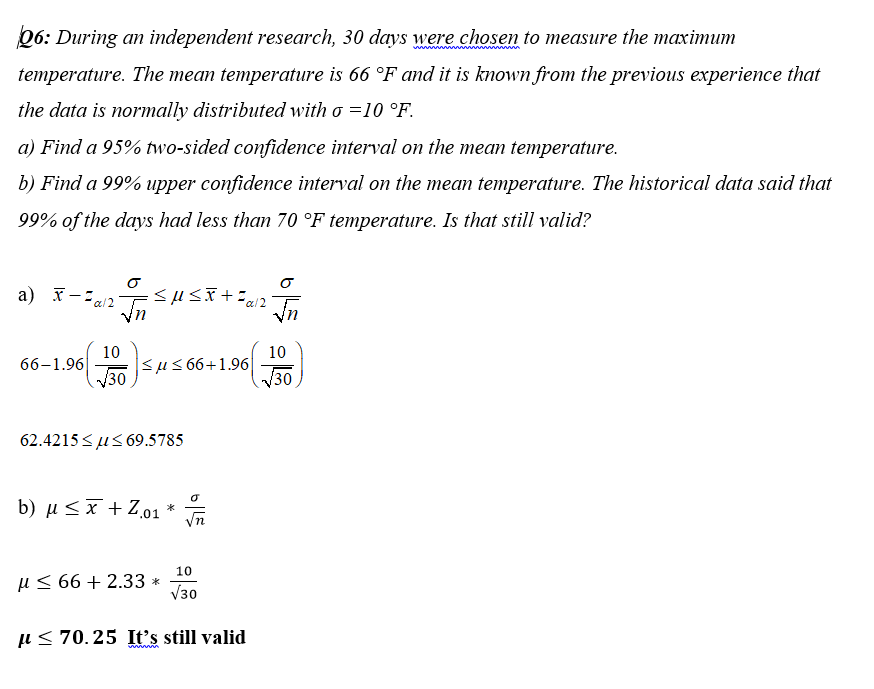

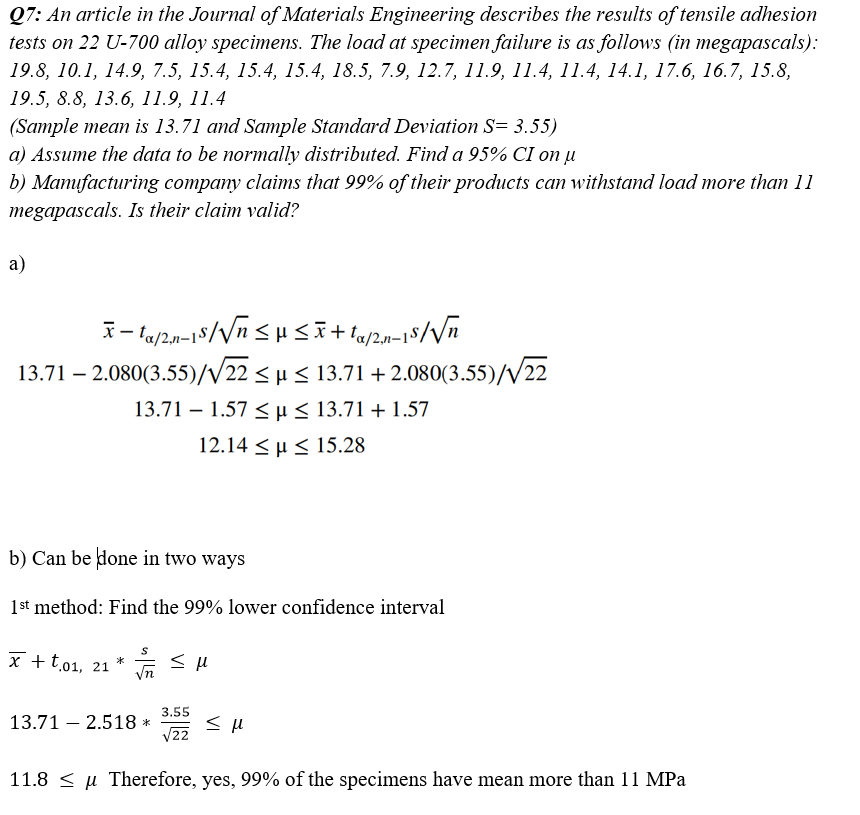

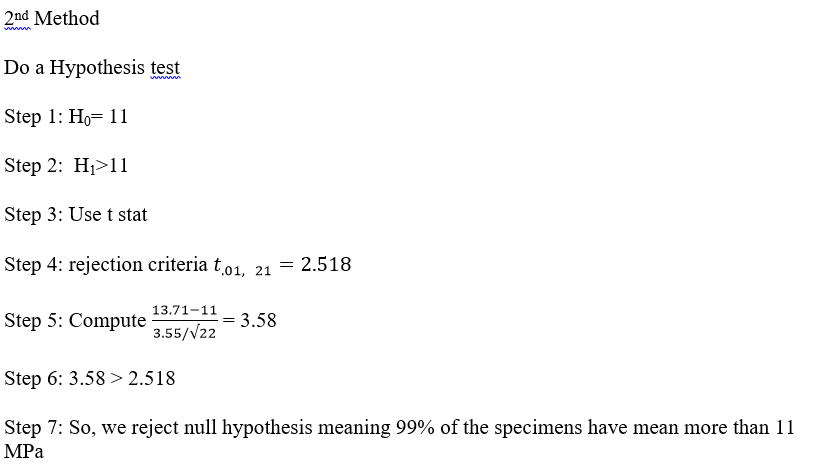

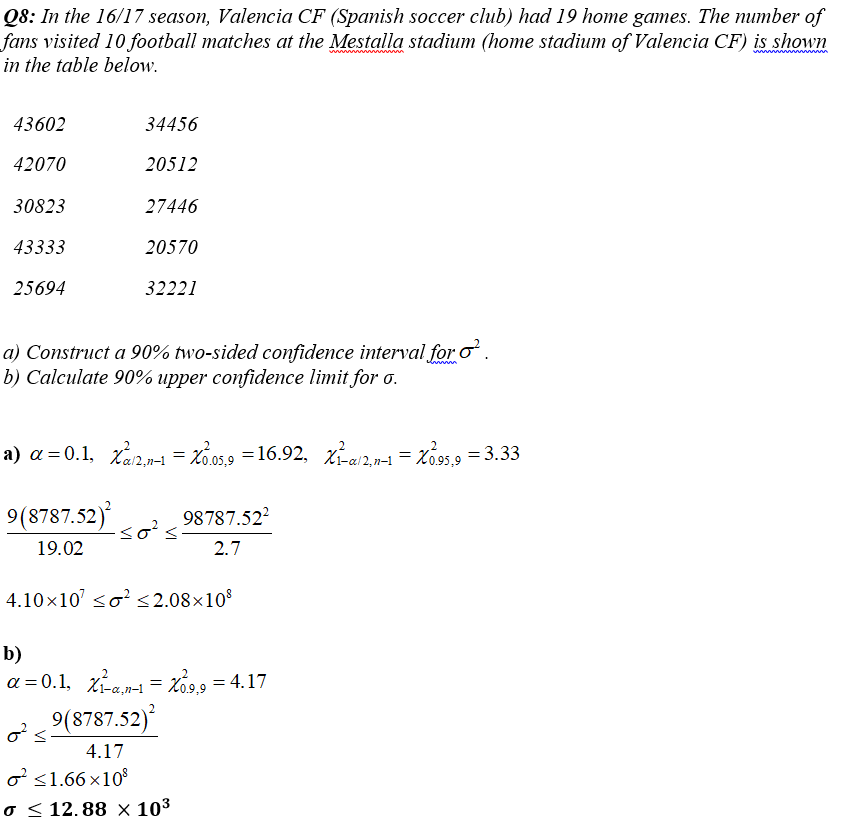

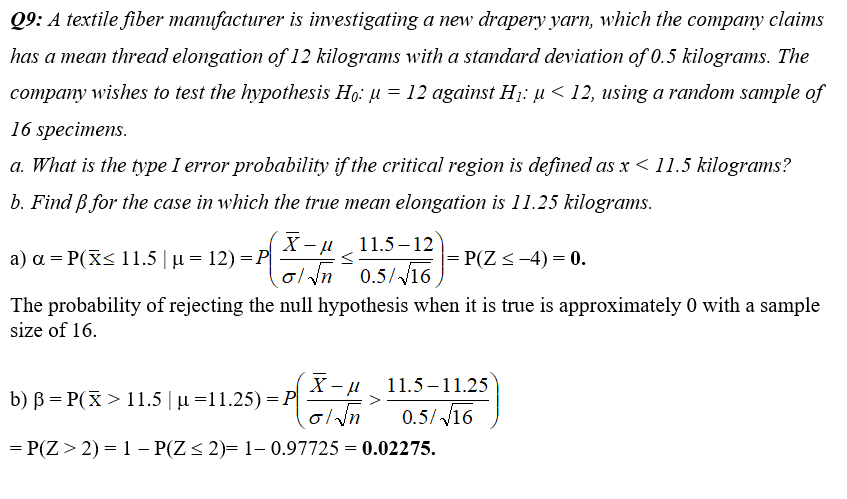

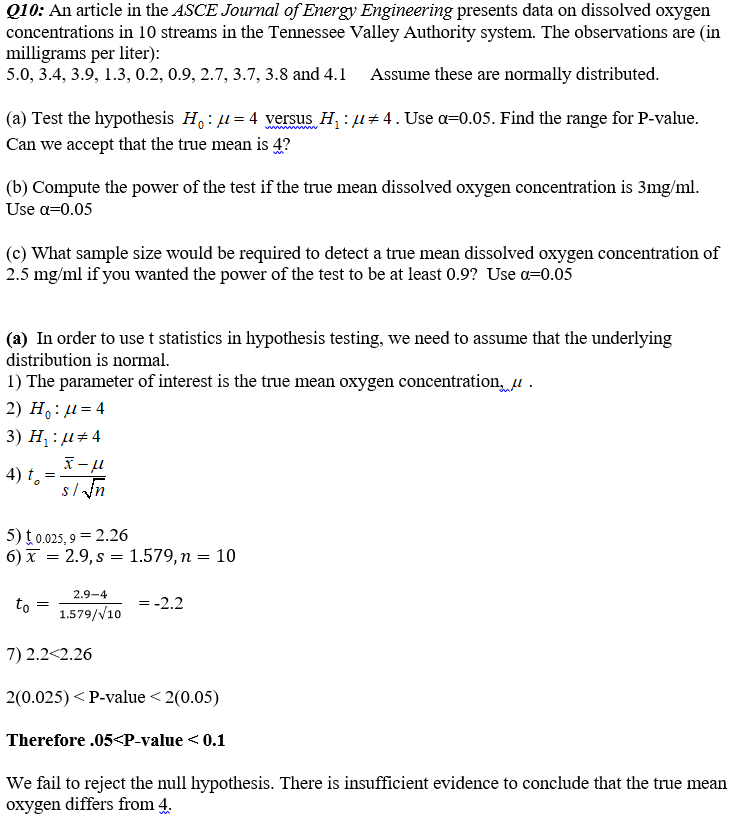

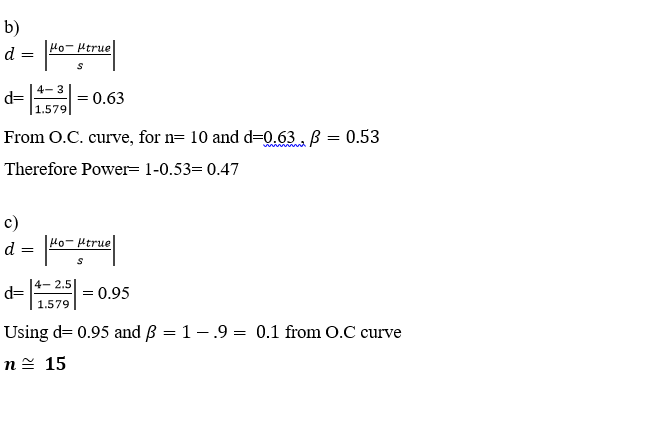

# **Take Home Part**

# **Question 1** (8 points)
The life in hours of a 75-watt light bulb is known to be normally distributed with sigma= 25 hours. A random sample of 21 bulbs has a mean life of X-bar= 1014 hours.

(a) Construct a 95% two-sided confidence interval on the mean life.

(b) Construct a 95% lower-confidence bound on the mean life. Compare the lower bound of this confidence interval with the one in part (a).

(C) Construct a 99% lower-confidence bound on the mean life. Compare the lower bound of this confidence interval with the one in part (b).

In [ ]:
!pip install pingouin
import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import math
from scipy.stats import ttest_1samp




In [ ]:
# (a) 95% Two-Sided Confidence Interval
sigma = 25
n = 21
x_bar = 1014

# Standard Error of the mean
se = sigma / np.sqrt(n)


z_95 = stats.norm.ppf(0.975)  # 95% confidence z-score
ci_95 = (x_bar - z_95 * se, x_bar + z_95 * se)



print("95% Two-Sided Confidence Interval:", ci_95 )

95% Two-Sided Confidence Interval: (1003.3075198588785, 1024.6924801411215)


In [ ]:
# (b) 95% Lower Confidence Bound
z_95_one = stats.norm.ppf(0.95)  # 95% confidence z-score for one-sided
lcb_95 = x_bar - z_95_one * se
print("95% lower Confidence Interval:", round(lcb_95,3))


95% lower Confidence Interval: 1005.027


In [ ]:
# (c) 99% Lower Confidence Bound
z_99 = stats.norm.ppf(0.99)  # 99% confidence z-score for one-sided
lcb_99 = x_bar - z_99 * se
print("99% lower Confidence Interval:", round(lcb_99,3))


99% lower Confidence Interval: 1001.309


# **Question 2** (12 points)
The female students in an undergraduate engineering core course at ASU self-reported their heights to the nearest inch.

The data:
62, 64, 61, 67, 65, 68, 61, 65, 60, 65, 64, 63, 59, 68, 64, 66, 68, 69, 65, 67, 62, 66, 68, 67, 66, 65, 69, 65, 69, 65, 67, 67, 65, 63, 64, 67, 65.

a. Can you support a claim that the mean height of female engineering students at ASU is at least 65 inches?

H0 : mu = 65,   H1 : mu  > 65

Use α = 0.05. Find the P-value.

b. Check the normality assumption.

c. Compute the power of the test if the true mean height is 68 inches.

d. What sample size would be required to detect a true mean height of 66 inches if you wanted the power of the test to be at least 0.8?


In [ ]:
height= np.array([62, 64, 61, 67, 65, 68, 61, 65, 60, 65, 64, 63, 59, 68, 64, 66, 68, 69, 65, 67, 62, 66, 68, 67, 66, 65, 69, 65, 69, 65, 67, 67, 65, 63, 64, 67, 65])


#a
ttest_1samp(a=height, popmean= 65)

t_stat, p_value= ttest_1samp(a=height, popmean= 65)

if p_value < 0.05:
  print("Reject the null hypothesis, We can support their claim. p-value is:", p_value)

else:
  print("Fail to rejet the null hypothesis,We can not support their claim.  p-value is:", p_value)

Fail to rejet the null hypothesis,We can not support their claim.  p-value is: 0.7005192397483202


In [ ]:
np.mean(height)

65.16216216216216

In [ ]:
ttest_1samp(a=height, popmean= 6)

TtestResult(statistic=0.38770240185074123, pvalue=0.7005192397483202, df=36)

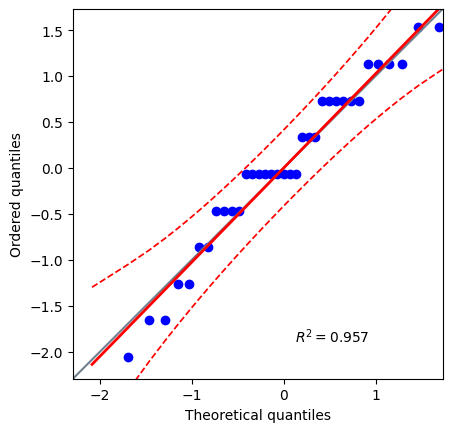

Data is normal


In [ ]:
#b
pg.qqplot(height)
plt.show()
print('Data is normal')

In [ ]:
#c
from statsmodels.stats.power import TTestIndPower

power_analysis = TTestIndPower()

d= (68-65)/np.std(height)

power = power_analysis.power(effect_size = d, alpha = 0.05, nobs1= len(height), alternative = 'larger')

print('The power for the hypothesis testing is', power)

The power for the hypothesis testing is 0.9997173923136069


In [ ]:
#d
d1=(66-65)/np.std(height)

sample_size = power_analysis.solve_power(effect_size = d1, alpha = 0.05, power = 0.8, alternative = 'larger')
print('The sample size needed for each group is', round(sample_size))

The sample size needed for each group is 79


# **Question 3 (a)** (12 Points)
A water supply company is trying to benchmark their water quality with the best supplier in the market. Hardness of water from two different water treatment facilities is investigated. The quality board believes the quality is not up to the mark. Observed water hardness (in ppm) for a random sample of faucets is as follows:

Facility 1	 63,	57,	58,	62,	66,	58,	61,	60,	55,	62,	59,	60,	58

Facility 2	 69,	65,	59,	62,	61,	57,	59,	60,	60,	62,	61,	66,	68

Is there evidence to support the claim that two facilities supply water of different hardness? What type test you should use? Check for variance


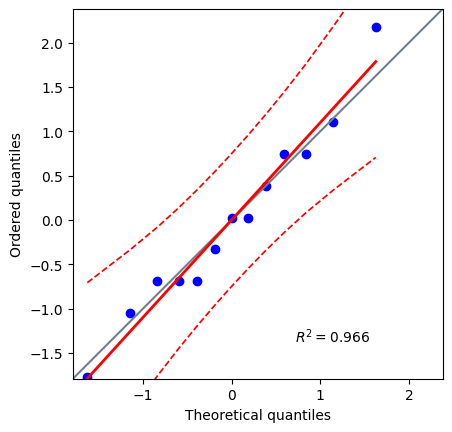

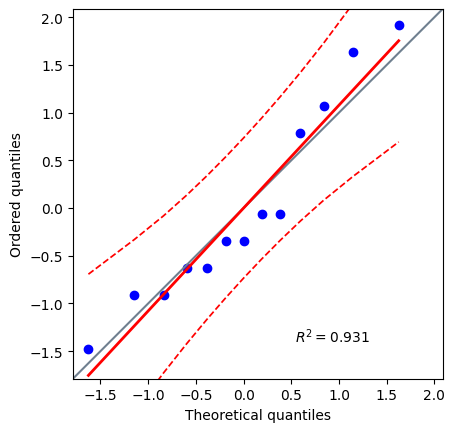

7.763313609467455
12.485207100591717


In [ ]:
facility1= [63, 57, 58, 62, 66, 58, 61, 60, 55, 62, 59, 60, 58]

facility2= [69, 65, 59, 62, 61, 57, 59, 60, 60, 62, 61, 66, 68]

df1=len(facility1)-1
df2=len(facility2)-1

#normality check
pg.qqplot(facility1)
plt.show()

pg.qqplot(facility2)
plt.show()


print(np.var(facility1))

print(np.var(facility2))

In [ ]:
F=np.var(facility2)/np.var(facility1)
alpha=0.05
P_value=1-stats.f.cdf(F, df1, df2)
if P_value > alpha:
  print('Fail Reject null hypothesis: Variance equal')
else :
  print ('Reject null hypothesis: Variance not equal')


Fail Reject null hypothesis: Variance equal


The sample water are from two different water treatment facilities and the variance is equal. So we should use indenpendent t test

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(a=facility1, b= facility2, equal_var= True)

TtestResult(statistic=-1.7765272567841552, pvalue=0.08832592775256123, df=24.0)

# Mathematically p-value is greater than alpha= .05 so we fail to reject the null hypothesis.Meaning the hardness quality of the two different sources are same. But if we take a look at the P- value, that is actually very close to alpha value that would led to rejection . So we should do more sampling and validate

# **Question 3(b)** (8 points)
The quality team decides to improve their water quality (decrease hardness) by changing extraction filters. The before and after quality observations are given below

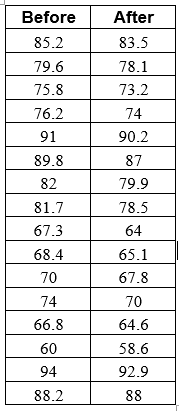

Did the mean hardness truely decrease after the modifaction? Construct a 99% two-sided confidence interval for the difference

the two dataset is from same source but before and after modification. So we should use dependent t test

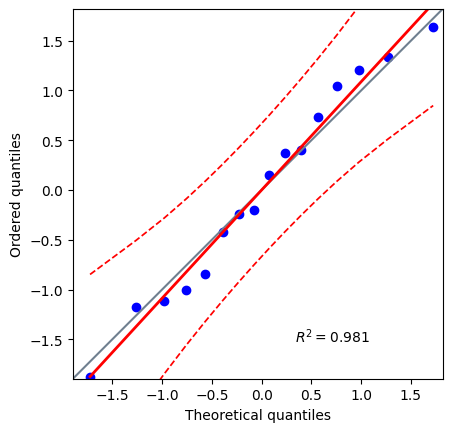

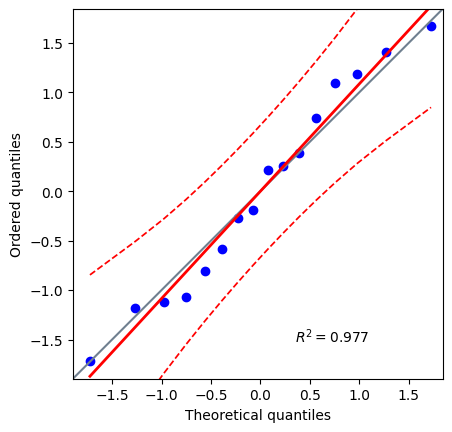

TtestResult(statistic=8.450258654134498, pvalue=4.3592305303112794e-07, df=15)

In [ ]:
before= [85.2, 79.6, 75.8, 76.2, 91, 89.8, 82, 81.7, 67.3, 68.4, 70, 74, 66.8, 60, 94, 88.2]

after= [83.5, 78.1, 73.2, 74, 90.2, 87, 79.9, 78.5, 64, 65.1, 67.8, 70, 64.6, 58.6, 92.9, 88]

pg.qqplot(before)
plt.show()

pg.qqplot(after)
plt.show()

from scipy.stats import ttest_rel
ttest_rel(a=before, b= after)

P value is much smaller than alpha. So we reject null hypotheis. Meaning the quality did improve after the midification

In [ ]:
ttest_rel(a=before, b= after).confidence_interval(confidence_level=.99)

ConfidenceInterval(low=1.408408690960369, high=2.916591309039631)

# **Question 4** (5 points Bonus)

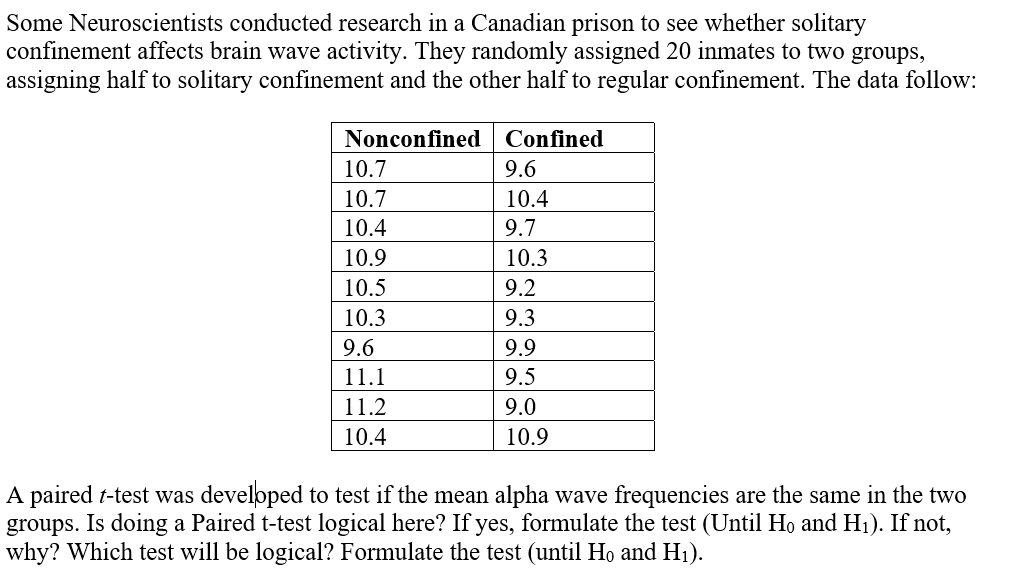

# A paired t test is not logical here as randomly selected 20 people were assigned to two groups. They did not had any common thing

# An independent two sample t test will be the most logical choice.
# H0: mu - non confined=mu - confined
# H1: mu-non confined /= mu- confined